In [1]:

# coding: utf-8

# In[8]:

import keras
import numpy as np
from scipy.misc import imresize
from matplotlib import pyplot as plt
import h5py


# In[23]:

class SVHN():

    path = ""

    def __init__(self):
        self.digit1 = keras.models.load_model('ioncanond1.h5')

        self.digit2 = keras.models.load_model('ioncanond2.h5')

        self.digit3 = keras.models.load_model('ioncanond3.h5')

        self.digit4 = keras.models.load_model('ioncanond4.h5')

        self.digit5 = keras.models.load_model('ioncanond5.h5')

    def get_sequence(self, image):
        n = list(self.numm.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        n = np.argmax(np.array(n).reshape((1,11)),axis=1)
        
        #A = list(self.model.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        #return([x%10 for x in np.argmax(np.array(A).reshape((5,11)),axis=1)[0:n[0]] if x != 0])
        #return([x%10 for x in np.argmax(np.array(A).reshape((5,11)),axis=1)[0:n[0]]])
        A = self.model.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3)))
        ttu = np.zeros(5)
        gg = [x%10 for x in np.argmax(np.array(A).reshape((5,11)),axis=1)[0:n[0]] if x != 0]
        ttu[0:min(n[0],len(gg))] = gg
        return ttu
    
    def indiv(self,image):
        yot =[]
        d1 = list(self.digit1.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        yot.append([x%10 for x in np.argmax(np.array(d1).reshape((1,11)),axis=1) if x != 0])
        
        d2 = list(self.digit2.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        yot.append([x%10 for x in np.argmax(np.array(d2).reshape((1,11)),axis=1) if x != 0])
        
        d3 = list(self.digit3.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        yot.append([x%10 for x in np.argmax(np.array(d3).reshape((1,11)),axis=1) if x != 0])
        
        d4 = list(self.digit4.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        yot.append([x%10 for x in np.argmax(np.array(d4).reshape((1,11)),axis=1) if x != 0])
        
        d5 = list(self.digit5.predict(imresize(image,(50,50),interp='cubic').reshape((1,50,50,3))))
        yot.append([x%10 for x in np.argmax(np.array(d5).reshape((1,11)),axis=1) if x != 0])
        
        return yot
        
    def load_model(self):
        f = h5py.File('ioncannonaug.h5', 'r+')
        del f['optimizer_weights']
        f.close()
        self.model = keras.models.load_model("ioncannonaug.h5")
        self.numm = keras.models.load_model("ioncanonnum.h5")


Using TensorFlow backend.


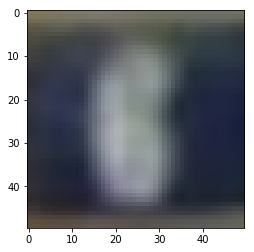

[6, 7]
[6.0 0.0 0.0 0.0 0.0 1.0]


In [5]:
if __name__ == "__main__":
        obj=SVHN.load_model()
        X = np.load("aug/resize_cropImage.npy")[0:13000,:]
        num = np.random.randint(len(X))
        plt.imshow(X[num])
        plt.show()
        print(obj.get_sequence(X[num]))
        nummertrain=np.load("aug/nummertrain.npy") 
        print(nummertrain[num])

In [2]:
X = np.load("aug/resize_cropImage.npy")
nummertrain=np.load("aug/nummertrain.npy") 
S = SVHN()
S.load_model()

KeyError: "Couldn't delete link (Can't delete self)"

In [ ]:
num = np.random.randint(len(X))
plt.imshow(X[num])
plt.show()
print(S.indiv(X[num]))
print(S.get_sequence(X[num]))
print([x%10 for x in nummertrain[num]])
print(np.array_equal(S.get_sequence(X[num]),[x%10 for x in nummertrain[num]][0:5]))

In [5]:
c=0
for i in range(len(X)):
    c+=np.array_equal(S.get_sequence(X[i]),[x%10 for x in nummertrain[i]][0:5])
print(100*c/len(X))

83.21956769055745
